In [1]:
# Importar librerias
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from openpyxl import Workbook
from numpy.polynomial import Polynomial
import warnings

warnings.filterwarnings("ignore")

In [61]:
x = sp.Symbol("x")
t = sp.Symbol("t")
m = sp.Symbol("m")
g = sp.Symbol("g")
k = sp.Symbol("k")
C1 = sp.Symbol("C1")

v = sp.Function("v")(t)


eqq = sp.Eq(v.diff(t) - (m * g - v * k) / m, 0)
sol = sp.dsolve(eqq)
eqq

Eq(Derivative(v(t), t) - (g*m - k*v(t))/m, 0)

In [53]:
v_fun = sol.rhs
def_v_fun = v_fun.subs({C1: 10, k: 20, g: -9.81, m: 5})
def_v_fun

-2.4525 + 10*exp(-4*t)

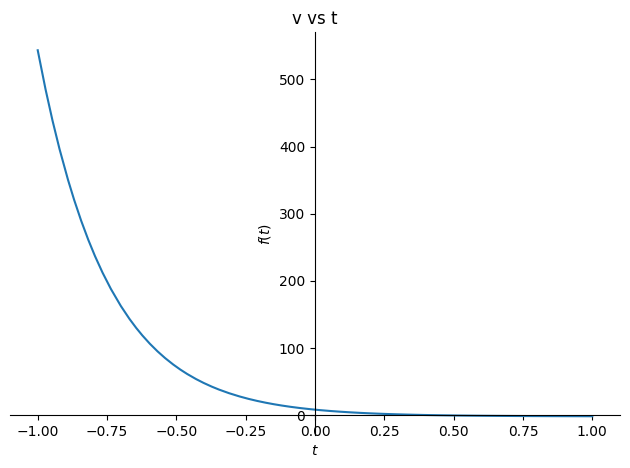

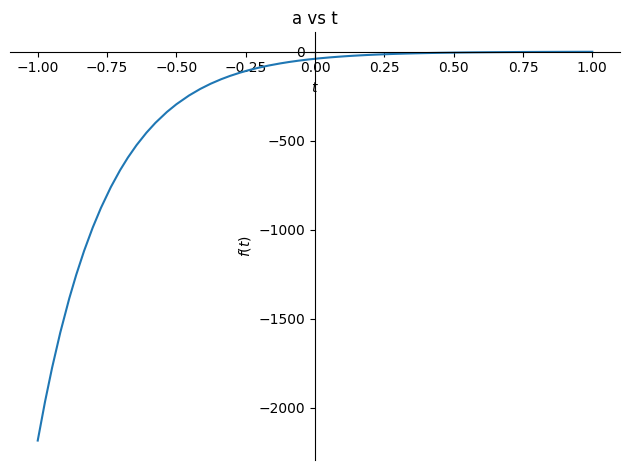

In [66]:
sp.plot(def_v_fun, (t, -1, 1), title="v vs t")
sp.plot(def_v_fun.diff(t), (t, -1, 1), title="a vs t")